In [19]:
import numpy as np

x = np.loadtxt('../data/q1/linearX.csv', delimiter=',')
y = np.loadtxt('../data/q1/linearY.csv', delimiter=',')

print(x.shape, y.shape)

(100,) (100,)


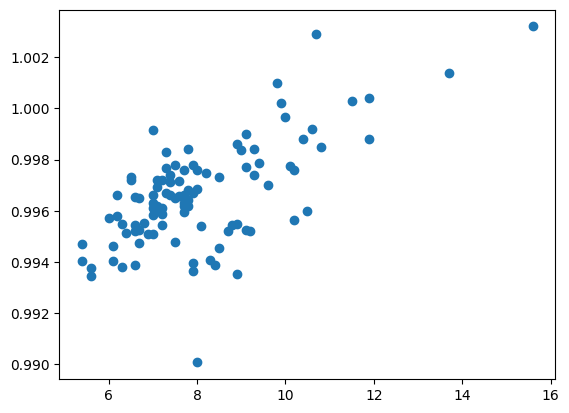

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

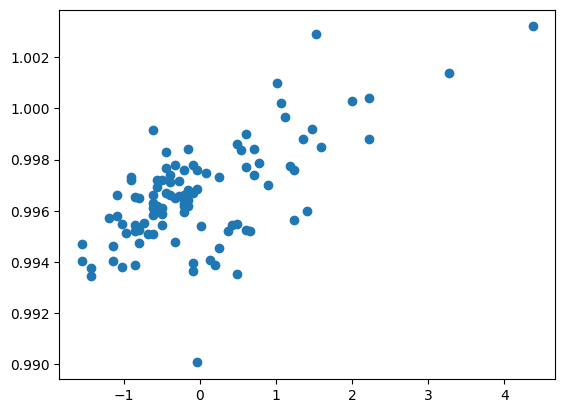

In [21]:
# normalise data
x = (x - np.mean(x)) / np.std(x)

#plot normalised data
plt.scatter(x, y)
plt.show()

In [22]:
theta = [0 for i in range(2)]

def hypothesis(theta, x):
    return theta[0] + theta[1]*x

def cost_function(theta, x, y):
    m = len(x)
    cost = 0
    for i in range(m):
        cost += (hypothesis(theta, x[i]) - y[i])**2
    return cost/(2*m)

def gradient_descent(theta, x, y, alpha, convergence):

    m = len(x)
    cost_history = []
    theta_history = []

    converged = False

    while not converged:
        cost_history.append(cost_function(theta, x, y))
        theta_history.append(theta)
        temp0 = theta[0] - (alpha/m)*sum([(hypothesis(theta, x[j]) - y[j]) for j in range(m)])
        temp1 = theta[1] - (alpha/m)*sum([(hypothesis(theta, x[j]) - y[j])*x[j] for j in range(m)])
        theta[0] = temp0
        theta[1] = temp1

        if abs(cost_function(theta, x, y) - cost_history[-1]) < convergence:
            converged = True

    return theta, cost_history, theta_history

In [23]:
theta, cost_history, theta_history = gradient_descent(theta, x, y, 0.01, 0.1**9)

print(theta, cost_history[-1], len(cost_history))

[0.9963085046961379, 0.0013397770034965105] 1.2443213939662906e-06 803


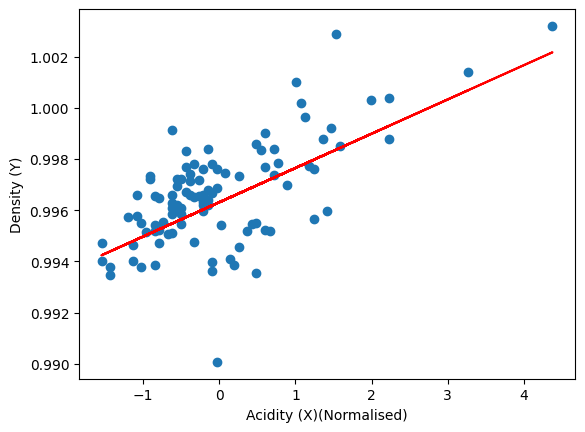

In [24]:
# plot line after training
plt.scatter(x, y)
plt.plot(x, hypothesis(theta, x), color='red')
plt.xlabel('Acidity (X)(Normalised)')
plt.ylabel('Density (Y)')
plt.savefig('../data/q1/plot.jpg')
plt.show()
# save plot as jpeg

In [30]:
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation

# Function to draw 3D mesh and save as GIF with a moving line for trajectory
def draw_3d_mesh_and_gif_with_line(X, y, theta_history, delay=0.2):
    # Initialize 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Labels and title
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Cost Function (J)')
    
    # Create theta0 and theta1 values for the meshgrid
    theta0_vals = np.linspace(min(theta_history[:, 0]) - 1, max(theta_history[:, 0]) + 1, 100)
    theta1_vals = np.linspace(min(theta_history[:, 1]) - 1, max(theta_history[:, 1]) + 1, 100)
    theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
    
    # Compute the cost function for each theta value in the meshgrid
    cost_vals = np.array([cost_function(X, y, np.array([t0, t1])) for t0, t1 in zip(np.ravel(theta0_mesh), np.ravel(theta1_mesh))])
    cost_mesh = cost_vals.reshape(theta0_mesh.shape)
    
    # Plot the surface
    ax.plot_surface(theta0_mesh, theta1_mesh, cost_mesh, alpha=0.5)
    
    # Initialize line for trajectory
    line, = ax.plot([], [], [], 'r-')
    
    # Define update function for animation
    def update(num):
        line.set_data(theta_history[:num+1, 0], theta_history[:num+1, 1])
        line.set_3d_properties([cost_function(X, y, theta_history[num]) for num in range(num+1)])
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=range(len(theta_history)), interval=delay*1000)
    
    # Save the animation as GIF
    ani.save('/mnt/data/3D_trajectory_line.gif', writer=PillowWriter(fps=1 / delay))
    
    plt.show()

# Create the 3D mesh plot and GIF with a moving line for trajectory
draw_3d_mesh_and_gif_with_line(x, y, np.array(theta_history))




NameError: name 'linearX_df' is not defined